In [19]:
from sklearn import datasets

In [20]:
X, y = sklearn.datasets.make_moons(1000)

In [21]:
X[0]

array([ 0.77222125, -0.47371292])

In [22]:
import pandas as pd
moons = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label":y})
moons

,X0,X1,label
0,0.772221,-0.473713,1
1,-0.640910,0.767616,0
2,-0.009444,0.999955,0
3,-0.596410,0.802680,0
4,0.833432,0.552622,0
...,...,...,...
995,1.252225,-0.467669,1
996,1.978495,0.293731,1
997,1.066058,-0.497816,1
998,0.982216,0.187752,0


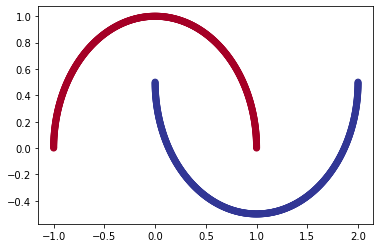

In [23]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [24]:
X.shape, y.shape

((1000, 2), (1000,))

In [25]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [31]:
import tensorflow as tf

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = "Adam",
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=40)

Epoch 1/40
25/25 [==============================] - 0s 1ms/step - loss: 0.8010 - accuracy: 0.4963
Epoch 2/40
25/25 [==============================] - 0s 2ms/step - loss: 0.7379 - accuracy: 0.5462
Epoch 3/40
25/25 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.6150
Epoch 4/40
25/25 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6488
Epoch 5/40
25/25 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6850
Epoch 6/40
25/25 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7063
Epoch 7/40
25/25 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7337
Epoch 8/40
25/25 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7525
Epoch 9/40
25/25 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7700
Epoch 10/40
25/25 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7812
Epoch 11/40
25/25 [

In [32]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8800


[0.27674776315689087, 0.8799999952316284]

In [29]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


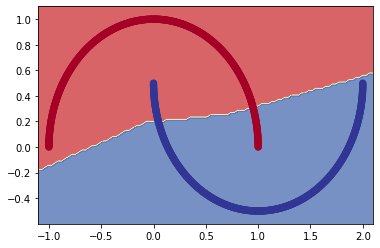

In [33]:
plot_decision_boundary(model_1, X, y)

## Improving our model

In [37]:
# Let's rebuild our model

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100) # this time we train our model longer

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7262
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.7075
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.7262
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7362
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7525
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7650
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7800
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7887
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7975
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8062
Epoch 11/

In [38]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.8750


[0.2401627004146576, 0.875]

In [39]:
# Let's rebuild our model

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"), # Increase the number of hidden units
  tf.keras.layers.Dense(6, activation="relu"), # Increase the number of hidden units
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train, y_train, epochs=50, verbose=0)

In [40]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.9250


[0.3043477535247803, 0.925000011920929]

In [41]:
# Let's rebuild our model

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(X_train, y_train, epochs=100, verbose=0) # this time we train our model longer

In [42]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.8750


[0.2397901713848114, 0.875]

doing binary classification


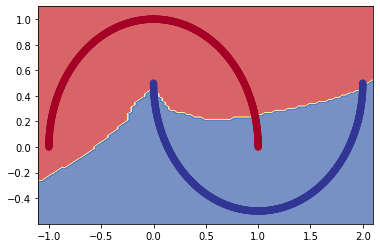

In [43]:
plot_decision_boundary(model_3, X, y)

doing binary classification


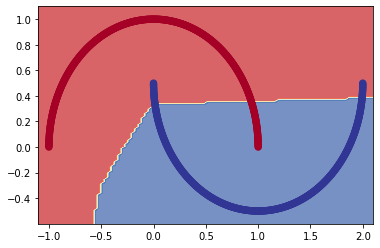

In [44]:
plot_decision_boundary(model_4, X, y)

In [45]:
# Let's rebuild our model

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase the learning rate
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(X_train, y_train, epochs=50, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [46]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000


[0.006036013830453157, 1.0]

doing binary classification


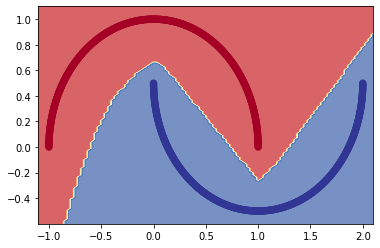

In [47]:
plot_decision_boundary(model_5, X, y)